# Predictive Analytics : Emisi CO2 oleh Kendaraan

![Image Emission C02](https://png.pngtree.com/png-clipart/20230925/original/pngtree-the-vehicle-emits-copious-amounts-of-co2-a-harmful-greenhouse-gas-png-image_12784556.png)

## Business Understanding

### Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah :
- Dari berbagai fitur yang ada, fitur mana yang paling berpengaruh terhadap emisi CO2 yang dihasilkan oleh kendaraan?
- Bagaimana mengetahui banyak emisi CO2 yang dihasilkan oleh kendaraan berdasarkan riwayat dari fitur-fitur yang ada?

### Goals

tujuan untuk menyelesaikan permasalahan diatas adalah:
- Mengetahui fitur yang paling berkorelasi dengan emisi CO2 yang dihasilkan oleh kendaraan.
- Membuat model machine learning yang dapat memprediksi seberapa banyak emisi CO2 yang dihasilkan oleh kendaraan secara akurat berdasarkan fitur-fitur yang ada.

### Solution statements
- Melakukan analisis pada data untuk memahami fitur-fitur yang mempengaruhi emisi CO2, dengan menerapkan teknik visualisasi data guna mengetahui korelasi antar fitur dan memahami hubungan antara data target (label) dan fitur lainnya.
- Menggunakan berbagai algoritma machine learning untuk membandingkan performa model, dengan tujuan mendapatkan model atau algoritma yang memiliki akurasi prediksi tertinggi dalam memperkirakan jumlah emisi CO2 yang dihasilkan oleh kendaraan.-

### Metodologi

Prediksi emisi CO2 kendaraan adalah tujuan yang ingin dicapai. Seperti yang kita ketahui, emisi CO2 merupakan variabel kontinu. Dalam predictive analytics, ketika membuat prediksi variabel kontinu, artinya Anda sedang menyelesaikan permasalahan regresi. Oleh karena itu, metodologi pada proyek ini adalah membangun model regresi dengan emisi CO2 kendaraan sebagai target.

### Metrik

Metrik yang digunakan untuk mengevaluasi seberapa baik model regresi dalam kasus prediksi variabel kontinu, seperti emisi CO2 kendaraan, antara lain adalah Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²). Metrik-metrik ini membantu mengukur seberapa akurat prediksi model terhadap nilai aktual. MAE mengukur rata-rata kesalahan absolut, MSE memberikan penalti lebih besar untuk kesalahan yang lebih besar, RMSE menunjukkan seberapa besar penyimpangan prediksi secara keseluruhan, dan R² mengukur proporsi variabilitas yang dapat dijelaskan oleh model.

## Data Understanding

adalah tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

### Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

<br>


**Informasi Datasets**


| Jenis | Keterangan |
| ------ | ------ |
| Title | CO2 Emission by Vehicles |
| Source | [Kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) |
| Owner | [Debajyoti Podder](https://www.kaggle.com/debajyotipodder) |
| License | Database: Open Database, Contents |
| Visibility | Publik |
| Tags | Business, Earth and Nature, Computer Science, Automobiles and Vehicles, Regression, Environment, Linear Regression, Pollution |
| Usability | 10.00 |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
!pip install gdown

!gdown --folder https://drive.google.com/drive/folders/1LezwKP2AjtAj0DT5iuaGpo6r7HuC8k2_

Retrieving folder contents
Processing file 1Qj-1zmTlkfJtPe_VeVbZc89eSRI9gp_f CO2 Emissions_Canada.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Qj-1zmTlkfJtPe_VeVbZc89eSRI9gp_f
To: /content/Dataset CO2 Emissions/CO2 Emissions_Canada.csv
100% 476k/476k [00:00<00:00, 30.2MB/s]
Download completed


In [3]:
path = '/content/Dataset CO2 Emissions/CO2 Emissions_Canada.csv'
df = pd.read_csv(path)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Output kode di atas memberikan informasi sebagai berikut:

Ada **7385 baris** dalam dataset dan terdapat **12 kolom** yaitu.

### Exploratory Data Analysis - Deskripsi Variabel


Berdasarkan informasi dari Kaggle, variabel-variabel pada **CO2 Emission by Vehicles** dataset adalah sebagai berikut: adalah sebagai berikut:

<br>

- **Make** : Perusahaan yang membuat kendaraan
- **Model** : Model dari kendaraan
- **Vehicle Class** : Kelas dari kendaraan berdasarkan utilitas, kapasitas dan berat
- **Engine Size (L)** : Ukuran dari mesin dalam satuan liter (L)
- **Cylinders** : Jumlah silinder kendaraan (ruang naiknya piston)
- **Transmission** : Tipe transmisi dengan jumlah gigi kendaraan
  - A = Otomatis
  - AM = Manual Otomatis
  - AS = Otomatis dengan pilihan shift
  - AV = Variabel kontinu
  - M = Manual
  - X = Angka dari gigi
- **Fuel Type** : Tipe bahan bakar
  - X = Bensin Reguler
  - Z = Bensin Premium
  - D = Disel
  - E = Ethanol (E85)
  - N = Gas Natural
- **Fuel Consumption City (L/100 km)** : Jumlah konsumsi bahan bakar dijalanan kota dalam satuan (L/100 km)
- **Fuel Consumption City (L/100 km)** : Jumlah konsumsi bahan bakar dijalanan raya dalam satuan (L/100 km)
- **Fuel Consumption Comb (L/100 km)** : Jumlah konsumsi bahan bakar (55% kota. 45% jalan raya) dalam satuan (L/100 km)
- **CO2 Emissions(g/km)** : Emisi knalpot karbon dioksida dalam gram/kilometer (g/km) dari gabungan berkendara pada jalanan kota dan jalan raya.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Dari Output diketahui bahaw:

- Terdapat **4 kolom** dengan tipe data **float64**.
- Terdapat **3 kolom** numerik dengan tipe data **int64**.
- Terdapat **5 kolom** dengan tipe data **object**.

In [5]:
df = df.drop(['Make', 'Model', 'Vehicle Class'], axis = 1)

Kode diatas untuk menghapus beberapa fitur yang tidak penting yaitu:

- Make: Fitur ini dihapus karena hanya berisi informasi mengenai nama perusahaan pembuat kendaraan.
- Model: Fitur ini dihapus karena hanya menjelaskan model dari kendaraan tersebut.
- Vehicle Class: Fitur ini dihapus karena hanya mengkategorikan model berdasarkan utilitas, kapasitas, dan dimensi kursi penumpang.

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [7]:
df.shape

(7385, 9)

Dari Output diatas didapat informasi:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 7385 | 9 |


<br>

### Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [8]:
df.duplicated().sum()

2819

In [9]:
df_cleaned = df.drop_duplicates()

setelah dicek terdapat 2819 data yang duplicated yang kemudian kita hapus

In [10]:
df_cleaned.isnull().sum()

,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0
Fuel Consumption Comb (mpg),0
CO2 Emissions(g/km),0


dari output diatas didapati bahwa tidak terdapat missing value pada dataset.

In [11]:
engine = (df_cleaned['Engine Size(L)'] == 0).sum()
cylinders = (df_cleaned['Cylinders'] == 0).sum()
transmission = (df_cleaned['Transmission'] == 0).sum()
ft = (df_cleaned['Fuel Type'] == 0).sum()
fcc = (df_cleaned['Fuel Consumption City (L/100 km)'] == 0).sum()
fch = (df_cleaned['Fuel Consumption Hwy (L/100 km)'] == 0).sum()
fccl = (df_cleaned['Fuel Consumption Comb (L/100 km)'] == 0).sum()
fccm = (df_cleaned['Fuel Consumption Comb (mpg)'] == 0).sum()
emission = (df_cleaned['CO2 Emissions(g/km)'] == 0).sum()


print("Nilai 0 di kolom Engine Size(L) ada: ", engine)
print("Nilai 0 di kolom Cylinders: ", cylinders)
print("Nilai 0 di kolom Transmission ada: ", transmission)
print("Nilai 0 di kolom Fuel Type ada: ", ft)
print("Nilai 0 di kolom Fuel Consumption City (L/100 km) ada: ", fcc)
print("Nilai 0 di kolom Fuel Consumption Hwy (L/100 km) ada: ", fch)
print("Nilai 0 di kolom Fuel Consumption Comb (L/100 km) ada: ", fccl)
print("Nilai 0 di kolom Fuel Consumption Comb (mpg) ada: ", fccm)
print("Nilai 0 di kolom CO2 Emissions(g/km) ada: ", emission)


Nilai 0 di kolom Engine Size(L) ada:  0
Nilai 0 di kolom Cylinders:  0
Nilai 0 di kolom Transmission ada:  0
Nilai 0 di kolom Fuel Type ada:  0
Nilai 0 di kolom Fuel Consumption City (L/100 km) ada:  0
Nilai 0 di kolom Fuel Consumption Hwy (L/100 km) ada:  0
Nilai 0 di kolom Fuel Consumption Comb (L/100 km) ada:  0
Nilai 0 di kolom Fuel Consumption Comb (mpg) ada:  0
Nilai 0 di kolom CO2 Emissions(g/km) ada:  0


setelah dicek untuk setiap kolum yg dipilih tidak terdapat nilai 0.

In [12]:
df_cleaned.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000
mean,3.083771,5.509417,12.399409,8.974989,10.858081,27.819974,247.824573
std,1.321013,1.804163,3.487781,2.248346,2.895522,7.378576,59.120147
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,9.900000,7.400000,8.800000,23.000000,204.000000
50%,3.000000,6.000000,11.900000,8.600000,10.500000,27.000000,242.000000
75%,3.600000,6.000000,14.300000,10.100000,12.400000,32.000000,283.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [13]:
df_cleaned.shape

(4566, 9)

total data menjadi 4566 baris

**Menangani Outliers**

menangani outliers dengan IQR Method

In [14]:

#Cek data outlier
numerical_feature = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
categorical_feature = ['Transmission', 'Fuel Type']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


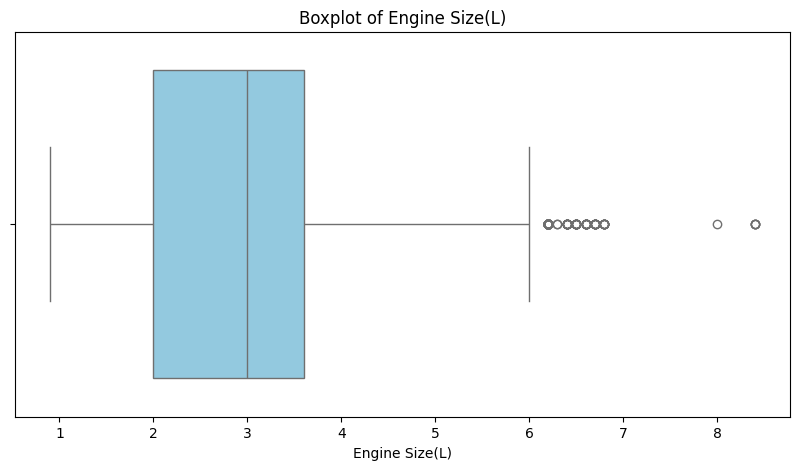

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


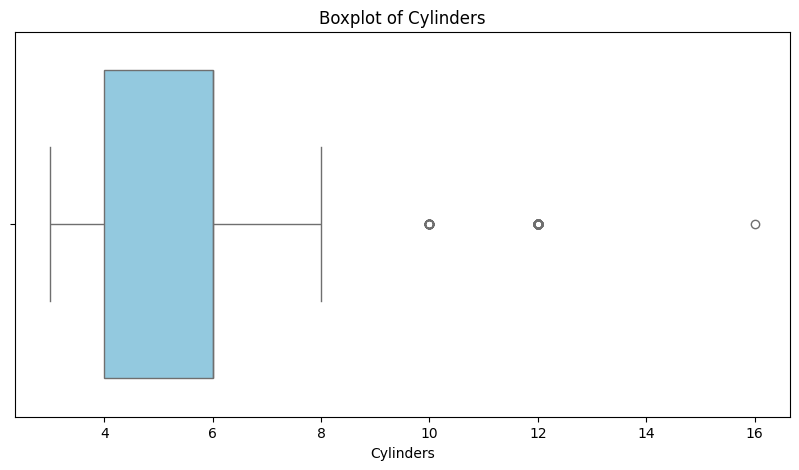

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


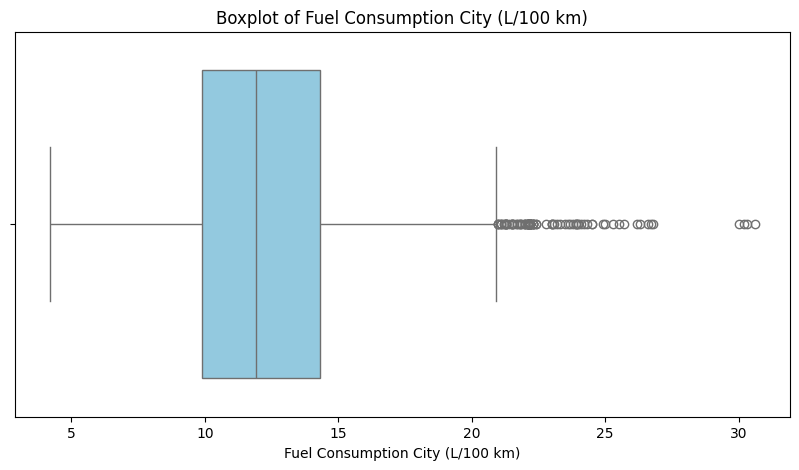

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


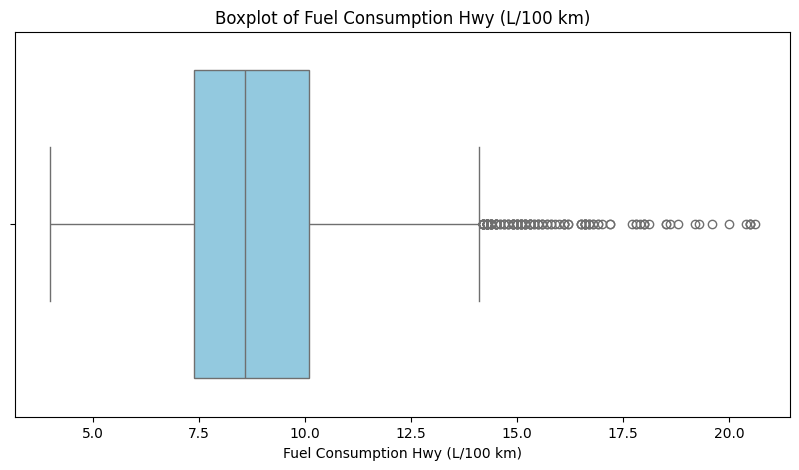

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


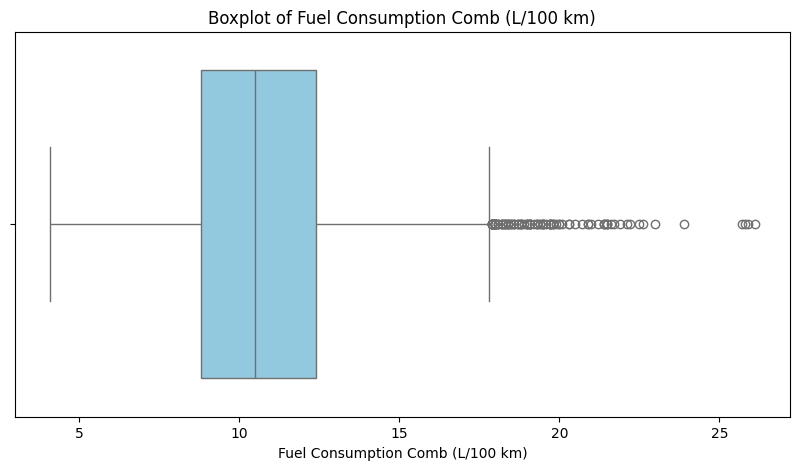

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


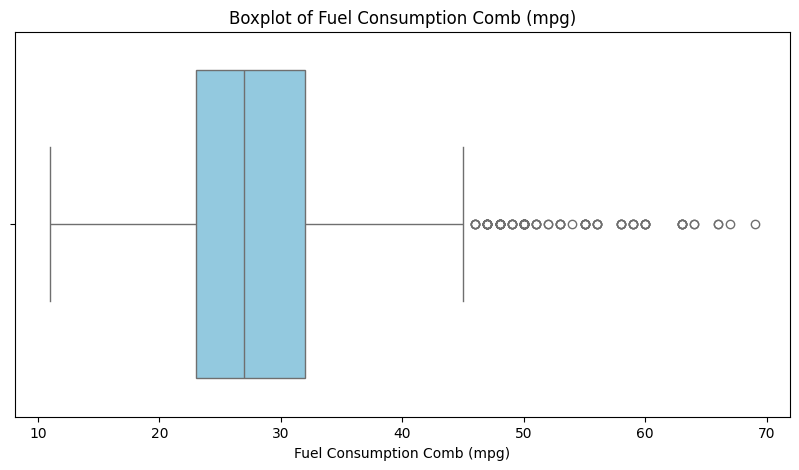

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


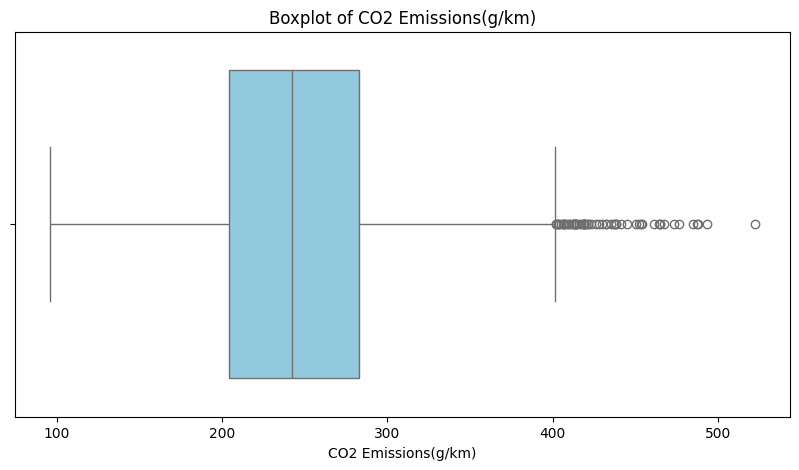

In [15]:
for num in numerical_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

In [16]:
selected_cols = df_cleaned[numerical_feature]

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df_filtered.shape

(4107, 9)

dataset kini menjadi **4107 baris** setelah penghapusan **outlier**

### Exploratory Data Analysis - Univariate Analysis

In [18]:
feature = categorical_feature[0]
count = df_filtered[feature].value_counts()

#Categorical
percent = 100 * df_filtered[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)

              Jumlah sample  Persentase
Transmission                           
AS6                     909        22.1
AS8                     603        14.7
M6                      507        12.3
A6                      325         7.9
AS7                     229         5.6
A9                      219         5.3
AM7                     209         5.1
A8                      165         4.0
AV                      147         3.6
M5                      136         3.3
AS10                    119         2.9
AV7                      80         1.9
AM6                      74         1.8
AV6                      72         1.8
AS9                      57         1.4
A5                       53         1.3
M7                       47         1.1
AV8                      33         0.8
AM8                      30         0.7
A7                       28         0.7
A4                       26         0.6
AS5                      18         0.4
AV10                      9         0.2


<ipython-input-19-83ac62e5b2b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_filtered, order=df_filtered['Transmission'].value_counts().index, palette='Set3')  # Ganti 'skyblue' dengan warna yang diinginkan
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/

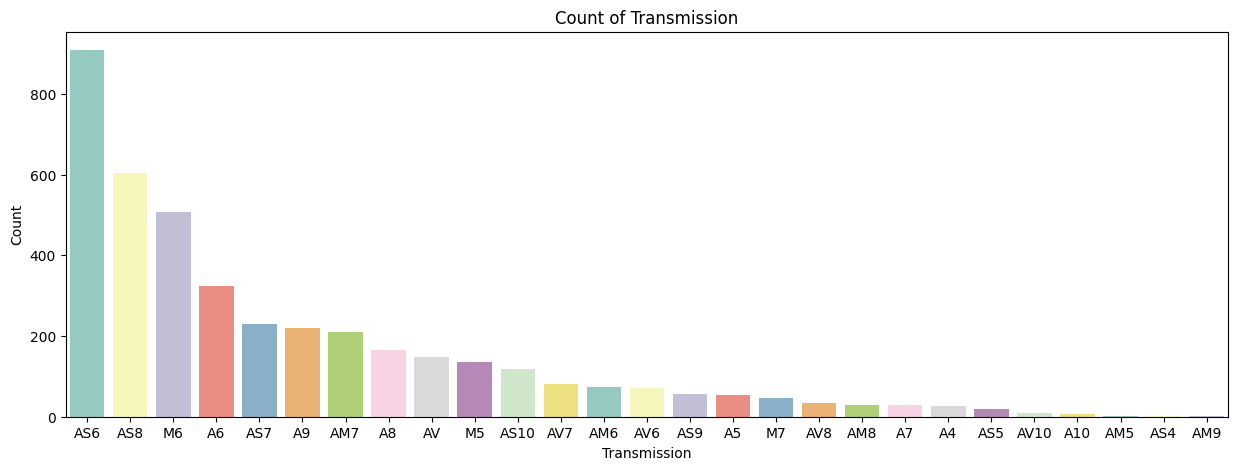

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x=feature, data=df_filtered, order=df_filtered['Transmission'].value_counts().index, palette='Set3')  # Ganti 'skyblue' dengan warna yang diinginkan
plt.title('Count of ' + feature)
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()


Terdapat 27 kategori fitur untuk transmisi yang dapat disimpulkan sebagai berikut:

- **Transmisi AS (Otomatis dengan pilihan shift)**: sebanyak 45.0% dari total sampel.
- **Transmisi A (Otomatis)**: sebanyak 19.2% dari total sampel.
- **Transmisi M (Manual)**: sebanyak 12.3% dari total sampel.
- **Transmisi AM (Manual Otomatis)**: sebanyak 7.7% dari total sampel.
- **Transmisi AV (Variabel kontinu)**: sebanyak 8.3% dari total sampel.

Dapat disimpulkan bahwa hampir setengah dari total kendaraan menggunakan tipe transmisi AS (Otomatis dengan pilihan shift), dengan proporsi mencapai 45.0%.

In [20]:
feature = categorical_feature[1]
count = df_cleaned[feature].value_counts()
percent = 100*df_cleaned[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

           jumlah sampel  persentase
Fuel Type                           
X                   2365        51.8
Z                   1861        40.8
E                    231         5.1
D                    108         2.4
N                      1         0.0


<ipython-input-21-0c36a430a68f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df_filtered, order=df_filtered['Fuel Type'].value_counts().index, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py

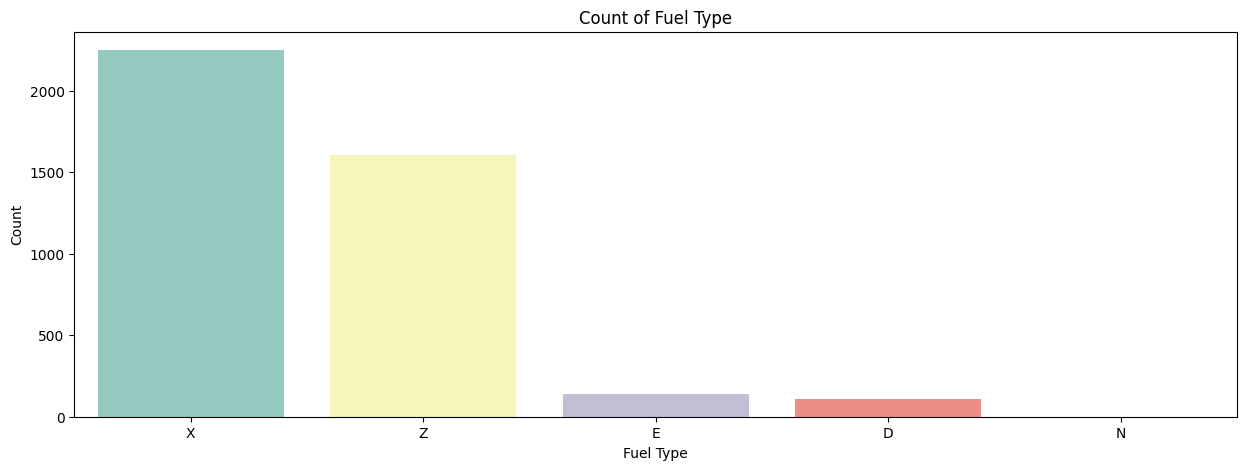

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x=feature, data=df_filtered, order=df_filtered['Fuel Type'].value_counts().index, palette='Set3')
plt.title('Count of ' + feature)
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()


Pada jenis bahan bakar, terdapat lima kategori, yaitu **X, Z, E, D,** dan **N**. Dapat disimpulkan bahwa sebagian besar kendaraan menggunakan bahan bakar jenis **X** dan **Z**, yaitu **Bensin Reguler** dan **Bensin Premium**, yang memiliki persentase mencapai **92,6%**.

**Numerical Features**

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya.

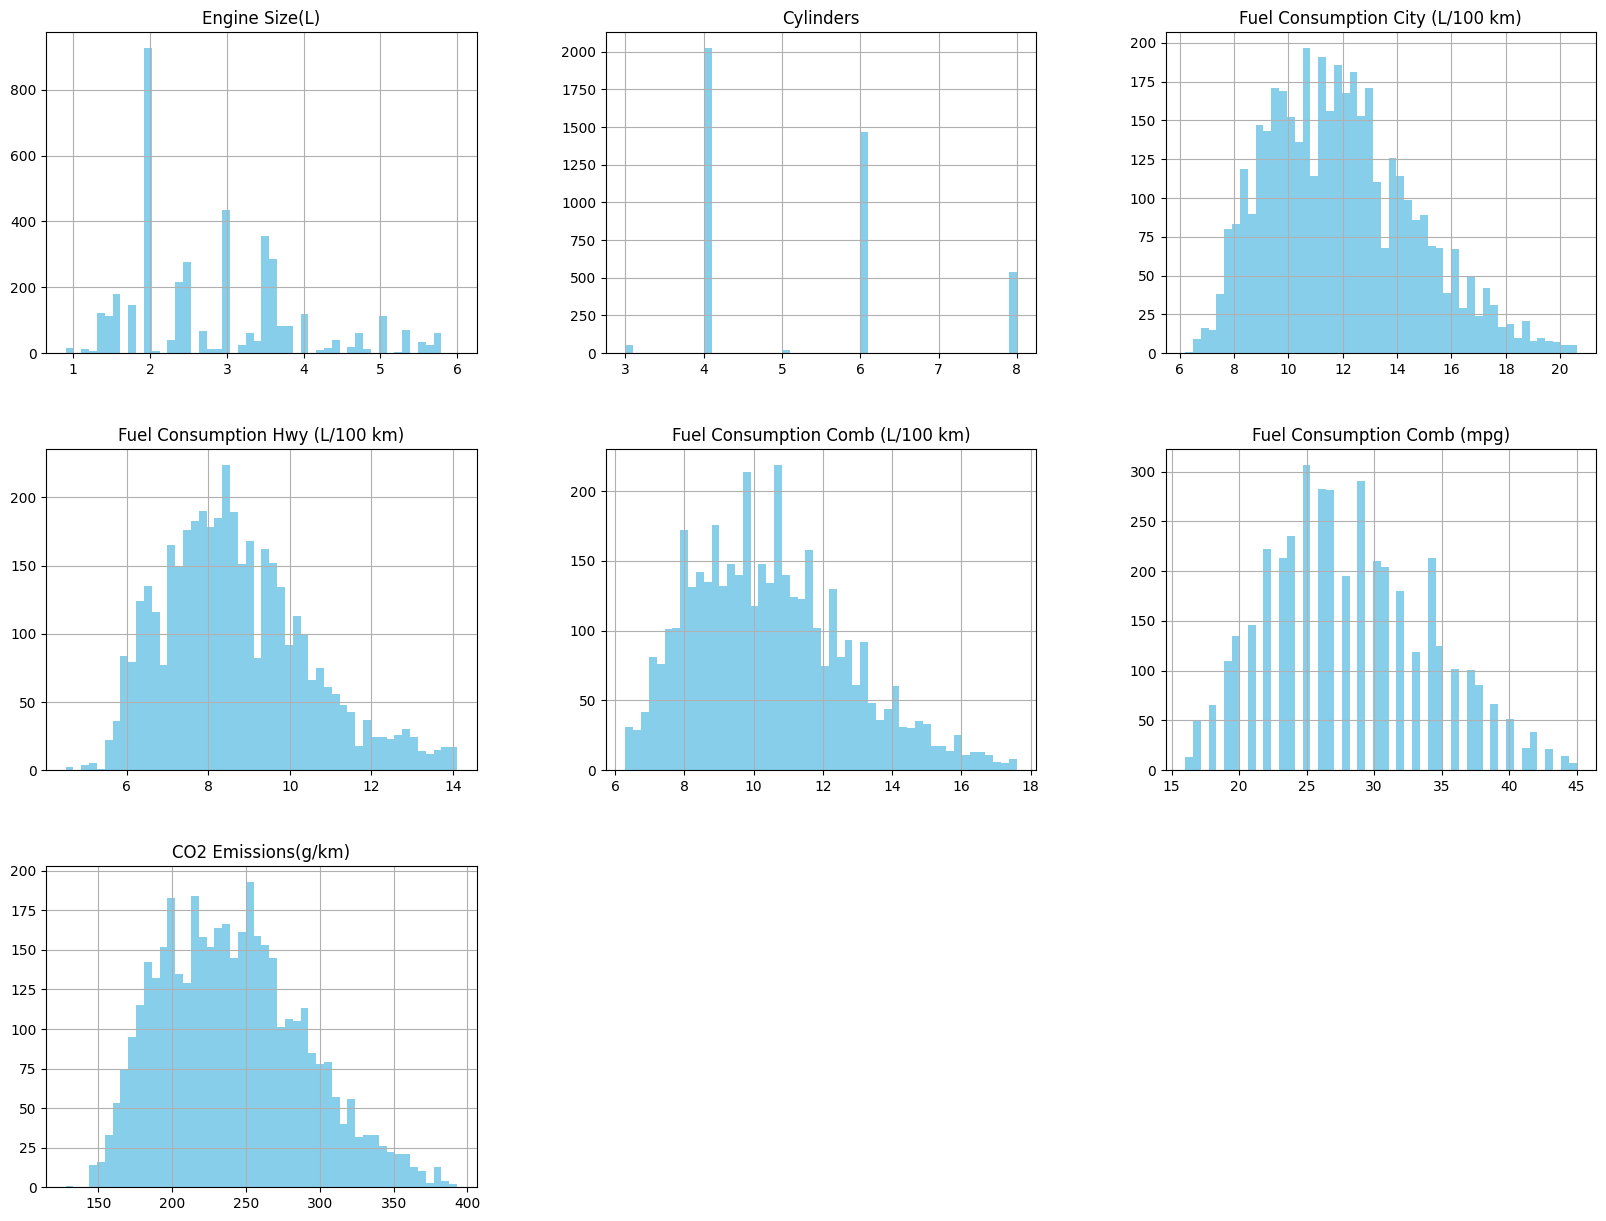

In [22]:
df_filtered.hist(bins=50, figsize=(20,15), color= 'skyblue')
plt.show()

Pada histogram di atas, khususnya pada fitur Emisi CO2 (g/km), dapat disimpulkan bahwa:

- Peningkatan emisi CO2 sejalan dengan meningkatnya jumlah sampel. Hal ini terlihat dari histogram fitur "Emisi CO2" yang menunjukkan peningkatan seiring bertambahnya sampel.
- Kadar emisi CO2 yang dihasilkan mencapai dua kali lipat dari batas normal, yaitu 522 g/km.
- Setengah dari kadar emisi CO2 berada dalam rentang 246 g/km.
Mayoritas kadar emisi CO2 terletak pada kuartil pertama hingga kuartil ketiga.
- Distribusi emisi CO2 cenderung miring ke kanan (left-skewed), yang menunjukkan bahwa nilai median (nilai tengah) berada di kuartil ketiga dan lebih tinggi daripada nilai rata-rata.

### Exploratory Data Analysis - Multivariate Analysis

Categorical Features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

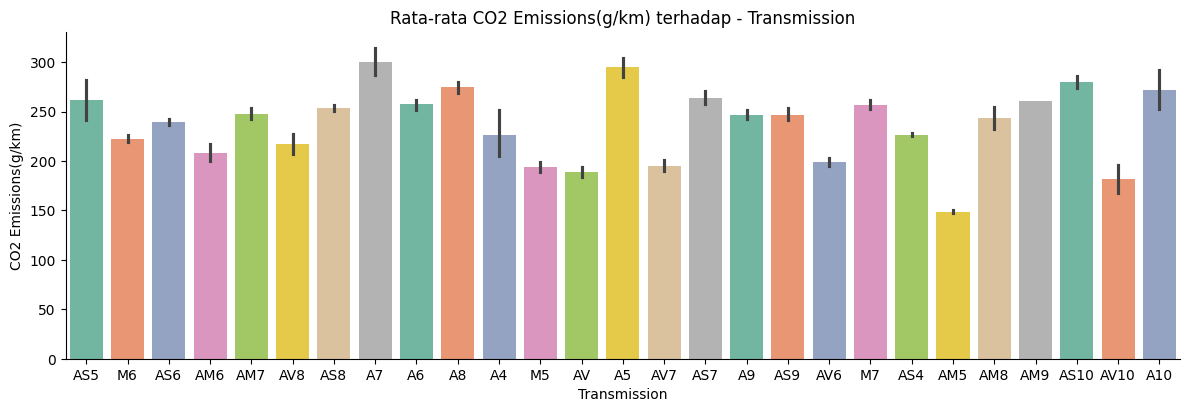

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

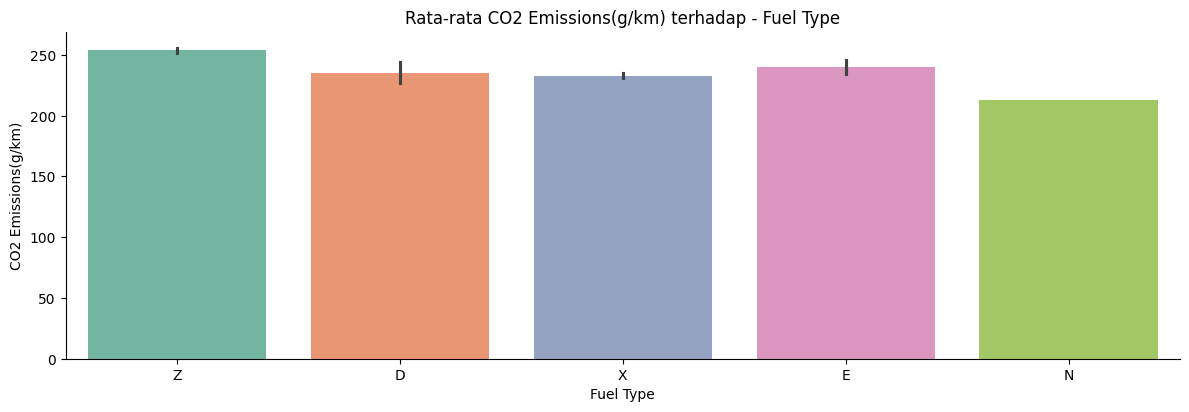

In [23]:
cat_features = df_filtered.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y="CO2 Emissions(g/km)", kind="bar", dodge=False, height=4, aspect=3, data=df_filtered, hue=col, palette="Set2", legend=False)
    plt.title("Rata-rata CO2 Emissions(g/km) terhadap - {}".format(col))
    plt.show()

Pada visualisasi terhadap fitur kategori, dapat disimpulkan:

- Rentang CO2 Emission pada tiap tipe transmission berkisar pada 140 - 300, dapat dilihat distribusi data tidak mengalami penurunan maupun peningkatan yang membuktikan kalau fitur transmission memiliki dampak kecil terhadap CO2 Emission
- Rentang CO2 Emission pada Fuel Type berada diatas 200 sampai dengan 250, dimana tiap Fuel Type memiliki kemiripan dan rentang yang tidak terlalu berselisih jauh yang membuktikan kalau fitur Fuel Type memiliki dampat kecil terhadap CO2 Emission.

**Numerical Features**

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

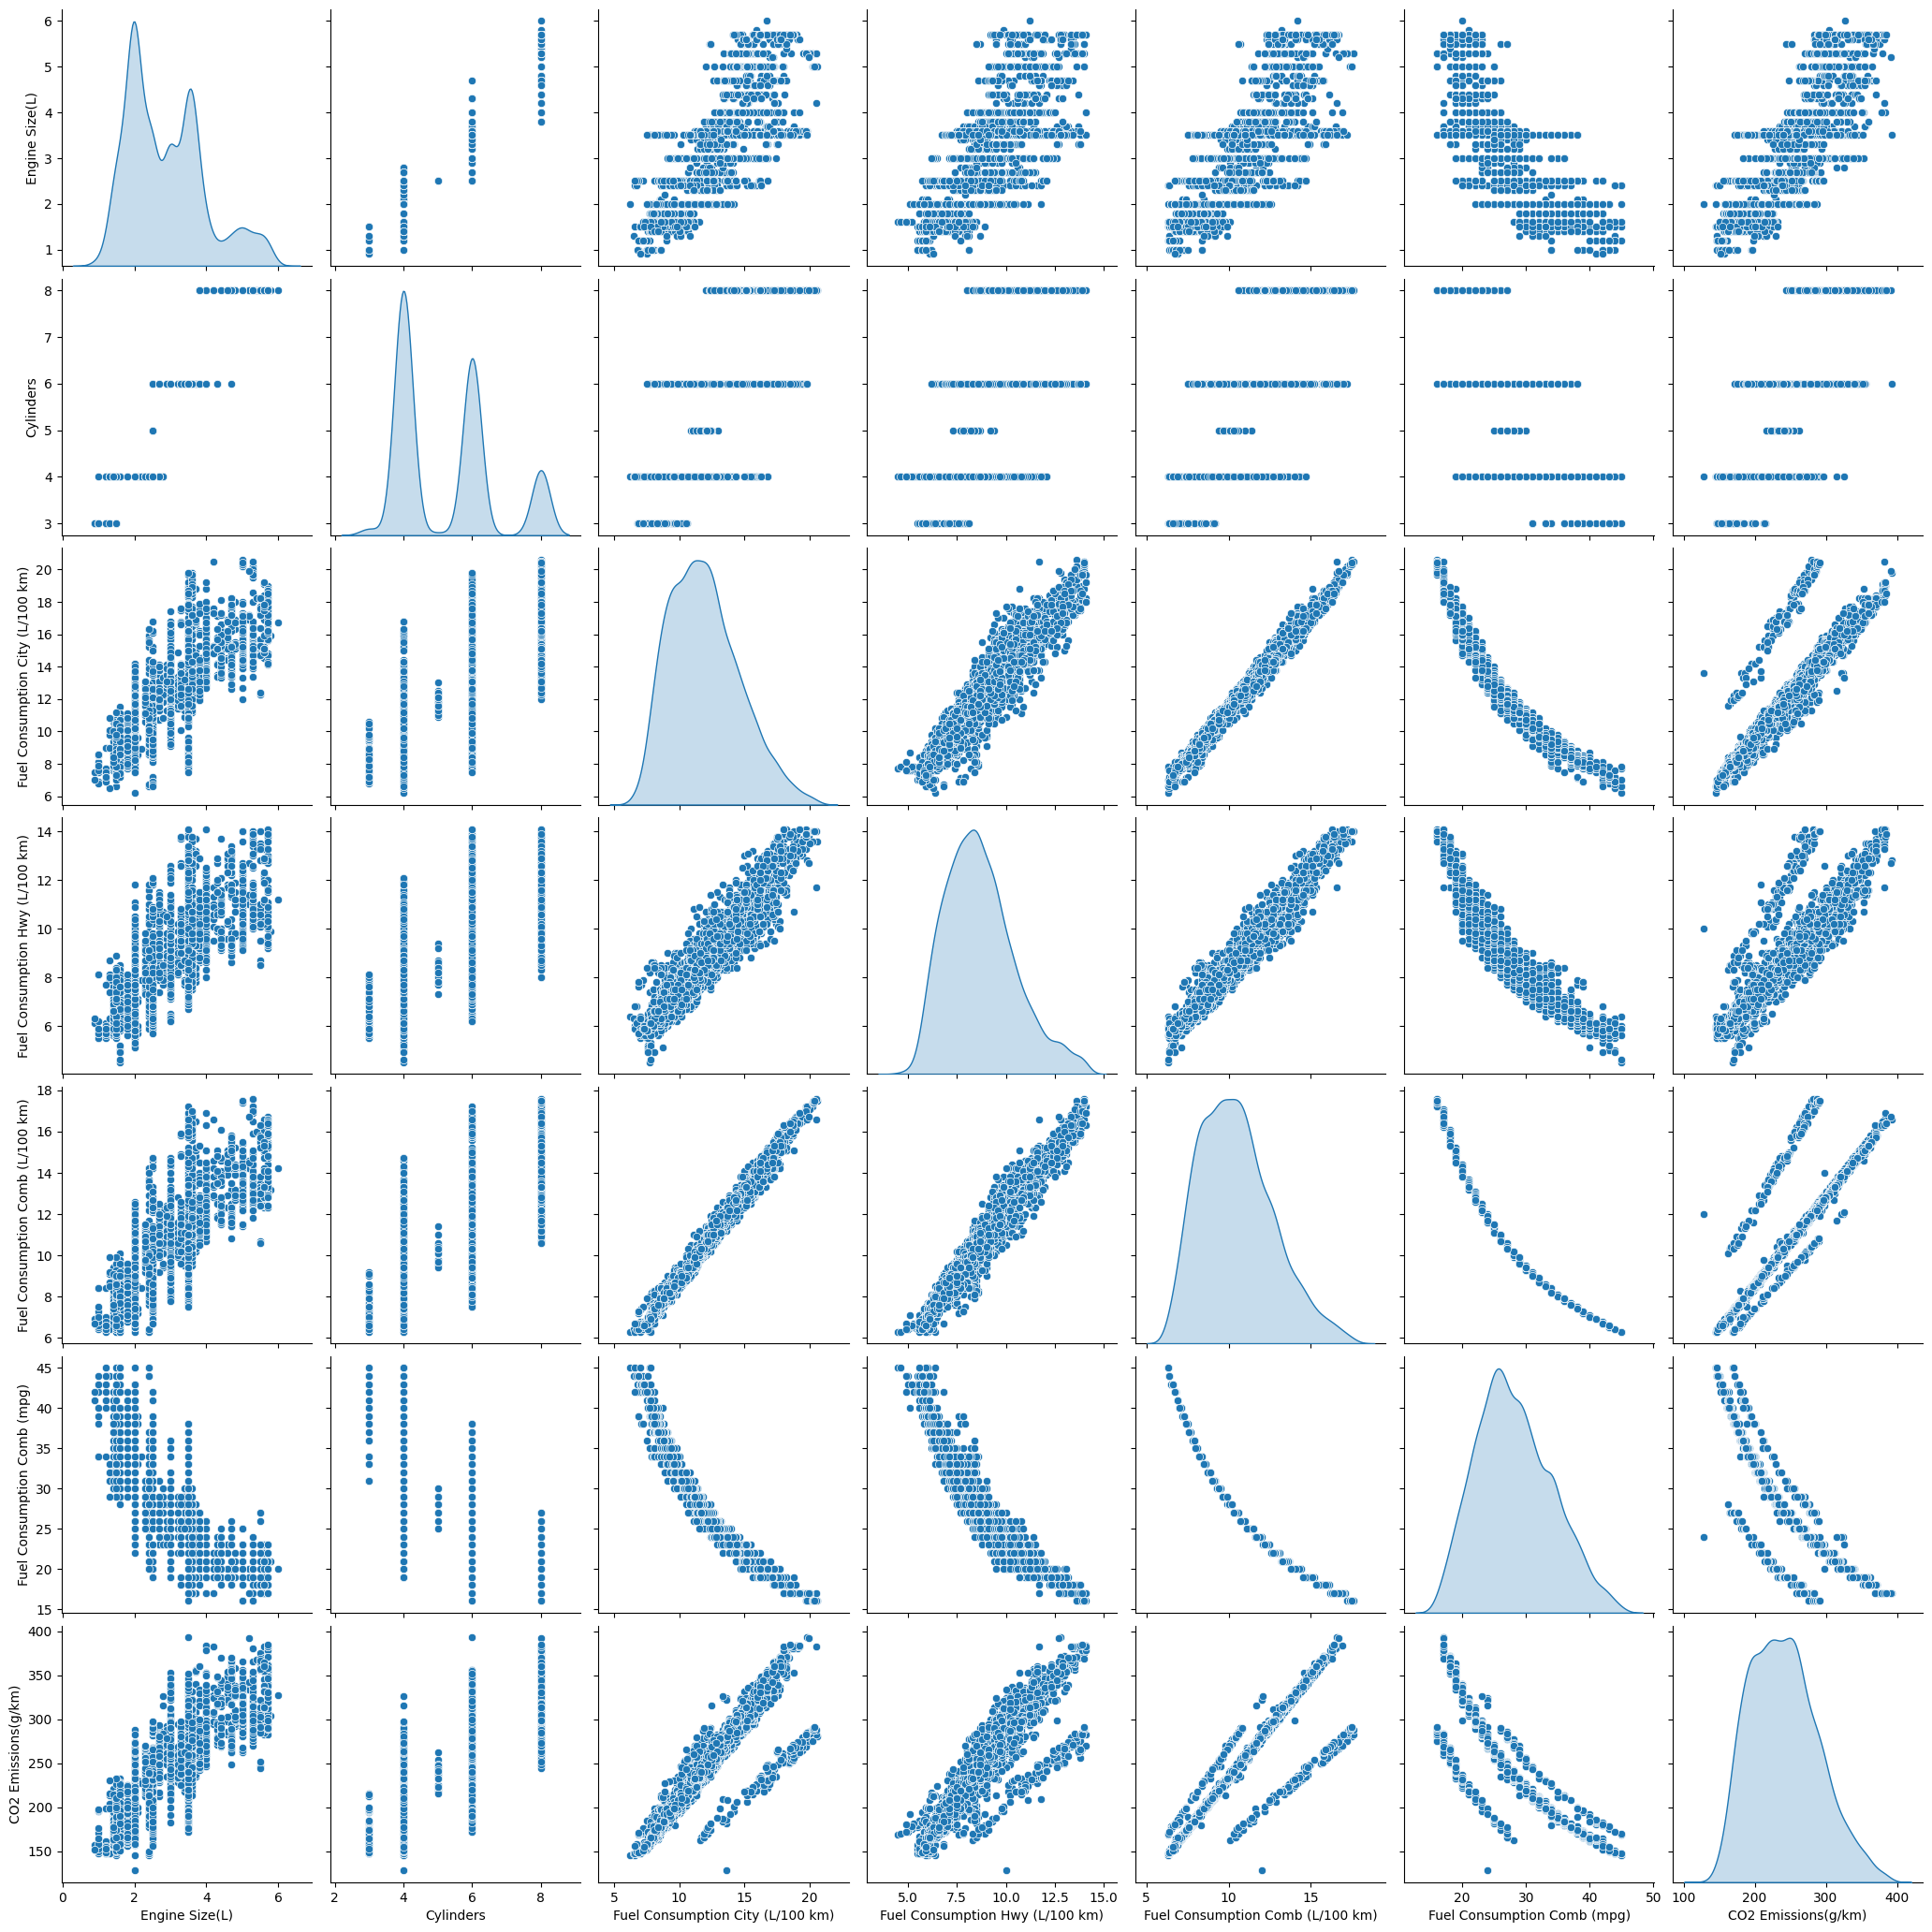

In [24]:
sns.pairplot(df_filtered, diag_kind = 'kde', height=3)

Pada visualisasi diatas dapat disimpulkan:

- Engine Size (L) vs CO2 Emissions (g/km): Terlihat hubungan linear yang kuat antara ukuran mesin dan emisi CO2. Semakin besar ukuran mesin, semakin tinggi pula emisi CO2 yang dihasilkan. Ini menunjukkan bahwa fitur ukuran mesin memiliki pengaruh signifikan terhadap emisi CO2.

- Fuel Consumption City (L/100 km) vs CO2 Emissions (g/km): Ada korelasi yang jelas antara konsumsi bahan bakar di dalam kota dan emisi CO2. Semakin tinggi konsumsi bahan bakar di dalam kota, semakin tinggi pula emisi CO2.

- Fuel Consumption Hwy (L/100 km) vs CO2 Emissions (g/km): Sama halnya dengan konsumsi bahan bakar di jalan raya, hubungan linear juga terlihat di sini, dengan peningkatan konsumsi bahan bakar di jalan raya berbanding lurus dengan peningkatan emisi CO2.

- Fuel Consumption Comb (L/100 km) vs CO2 Emissions (g/km): Konsumsi bahan bakar gabungan juga memiliki korelasi positif dengan emisi CO2. Semakin tinggi konsumsi bahan bakar, semakin tinggi emisi CO2 yang dihasilkan.

- Fuel Consumption Comb (mpg) vs CO2 Emissions (g/km): Dalam grafik ini, terlihat bahwa semakin tinggi (mpg), semakin rendah emisi CO2. Ini menunjukkan bahwa efisiensi bahan bakar yang lebih baik (mpg lebih tinggi) menghasilkan emisi CO2 yang lebih rendah.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

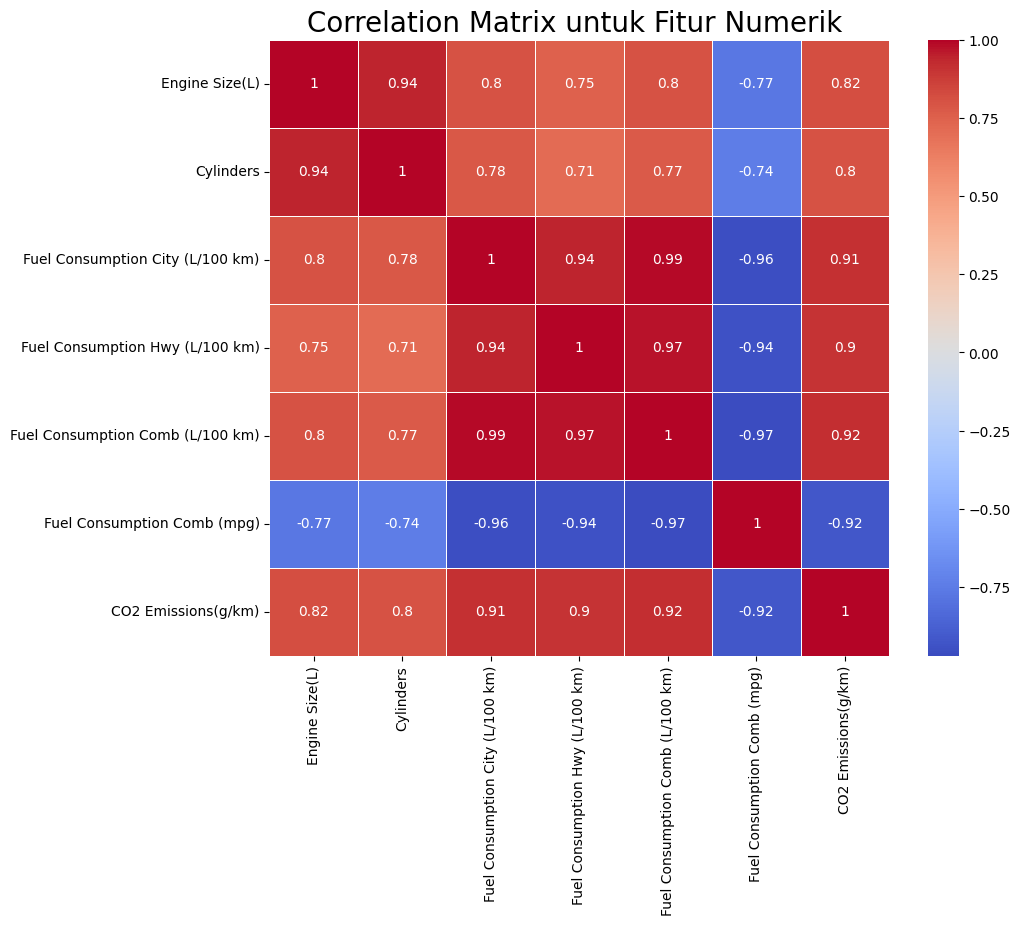

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered[numerical_feature].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan matriks korelasi untuk fitur numerik yang ditampilkan:

- Engine Size (L) memiliki korelasi yang kuat dengan CO2 Emissions (g/km) sebesar 0.82. Ini menunjukkan bahwa semakin besar ukuran mesin, semakin tinggi emisi CO2. Selain itu, Engine Size (L) juga memiliki korelasi tinggi dengan jumlah Cylinders (0.94), yang cukup logis mengingat mesin yang lebih besar cenderung memiliki lebih banyak silinder.

- Cylinders juga memiliki korelasi yang tinggi dengan CO2 Emissions (g/km) (0.8), menunjukkan bahwa kendaraan dengan lebih banyak silinder cenderung menghasilkan lebih banyak emisi.

- Fuel Consumption (L/100 km), baik dalam kota (City), di jalan raya (Hwy), maupun gabungan (Comb), semuanya memiliki korelasi sangat tinggi dengan CO2 Emissions (g/km), masing-masing 0.91, 0.9, dan 0.92. Ini mengindikasikan bahwa konsumsi bahan bakar merupakan faktor utama yang mempengaruhi emisi CO2.

- Sebaliknya, Fuel Consumption Comb (mpg) menunjukkan korelasi negatif yang kuat dengan CO2 Emissions (g/km) (-0.92). Ini berarti bahwa kendaraan dengan efisiensi bahan bakar yang lebih tinggi (mpg lebih tinggi) menghasilkan emisi CO2 yang lebih rendah, sesuai dengan ekspektasi.

- Korelasi antara Fuel Consumption City (L/100 km) dan Fuel Consumption Hwy (L/100 km) adalah sangat tinggi (0.94), begitu juga antara keduanya dengan Fuel Consumption Comb (L/100 km) yang masing-masing 0.99 dan 0.97. Ini menunjukkan bahwa ketiga variabel ini sangat terkait satu sama lain dan cenderung memberikan informasi yang serupa.

## Data Preparation

Teknik Data preparation yang dilakukan terdiri dari:

- Label encoding
- OneHot encoding
- Reduksi dimensi dengan PCA
- Train-test-split data

### Encoding Fitur Kategori

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_filtered['Transmission'] = label_encoder.fit_transform(df_filtered['Transmission'])

df_filtered.head(25)

<ipython-input-26-db9c28621524>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transmission'] = label_encoder.fit_transform(df_filtered['Transmission'])


,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,14,Z,9.9,6.7,8.5,33,196
1,2.4,4,25,Z,11.2,7.7,9.6,29,221
3,3.5,6,15,Z,12.7,9.1,11.1,25,255
4,3.5,6,15,Z,12.1,8.7,10.6,27,244
5,3.5,6,15,Z,11.9,7.7,10.0,28,230
6,3.5,6,15,Z,11.8,8.1,10.1,28,232
7,3.7,6,15,Z,12.8,9.0,11.1,25,255
8,3.7,6,25,Z,13.4,9.5,11.6,24,267
9,2.4,4,14,Z,10.6,7.5,9.2,31,212
10,2.4,4,25,Z,11.2,8.1,9.8,29,225


fitur Transmission akan diubah menggunakan LabelEncoder.

In [27]:
from sklearn.preprocessing import  OneHotEncoder
df_final = pd.concat([df_filtered, pd.get_dummies(df_filtered['Fuel Type'], prefix='Fuel Type')],axis=1)
df_final.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,14,Z,9.9,6.7,8.5,33,196,False,False,False,False,True
1,2.4,4,25,Z,11.2,7.7,9.6,29,221,False,False,False,False,True
3,3.5,6,15,Z,12.7,9.1,11.1,25,255,False,False,False,False,True
4,3.5,6,15,Z,12.1,8.7,10.6,27,244,False,False,False,False,True
5,3.5,6,15,Z,11.9,7.7,10.0,28,230,False,False,False,False,True


fitur Fuel Type diubah menggunakan OneHotEncoder.

### Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

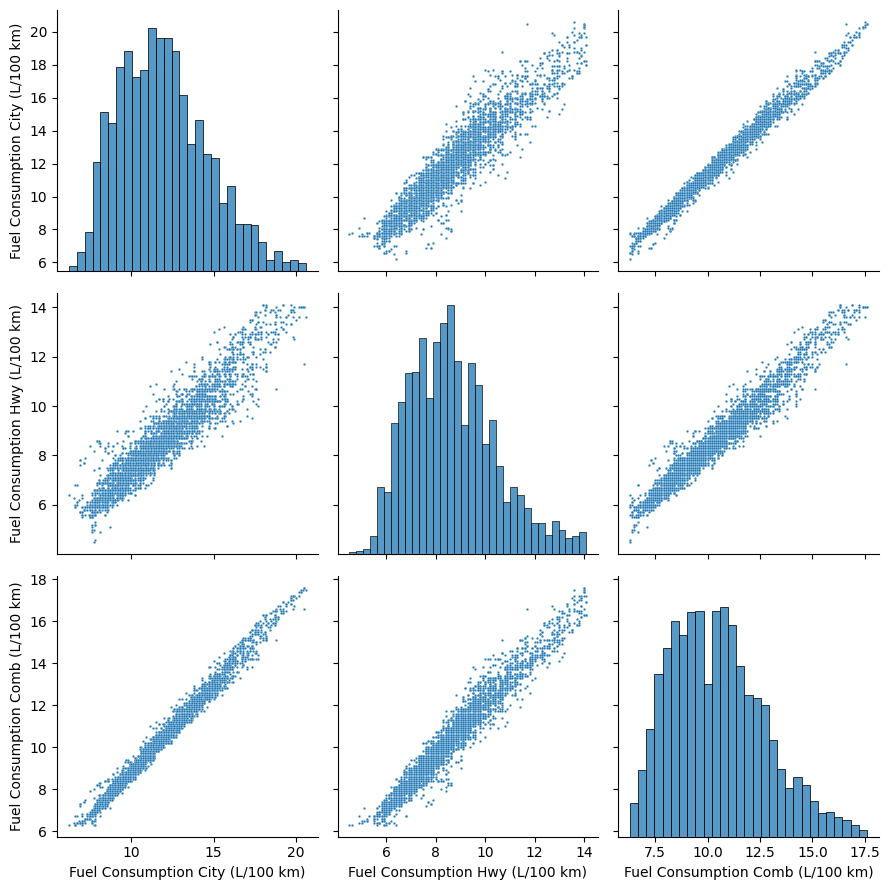

In [28]:
sns.pairplot(df_final[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']],
             plot_kws={"s": 3}, height=3)

plt.tight_layout()
plt.show()

pada pairplot diatas terlihat kalau ketiga feature yaitu Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) dan Fuel Consumption Comb (L/100 km) memiliki korelasi yang cukup tinggi sehingga dapat dilakukan proses reduksi dimensi

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(df_final[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])
princ_comp = pca.transform(df_final[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])

In [30]:
pca.explained_variance_ratio_.round(3)

array([0.982, 0.018, 0.   ])

In [31]:
pca = PCA(n_components = 1, random_state = 50)
pca.fit(df_final[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])
df_final['Fuel Consumption'] = pca.transform(df_final.loc[:, ('Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)')]).flatten()
df_final.drop(['Fuel Type','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'], axis = 1, inplace = True)

Setelah diketahui ketiga fitur tersebut berkorelasi dilakukan reduksi dimensi dengan PCA, membuat fitur baru yaitu Fuel Consumption untuk menggantikan ketiga fitur tersebut.

In [32]:
df_final.head()

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Fuel Consumption
0,2.0,4,14,33,196,False,False,False,False,True,-3.427037
1,2.4,4,25,29,221,False,False,False,False,True,-1.457258
3,3.5,6,15,25,255,False,False,False,False,True,1.057832
4,3.5,6,15,27,244,False,False,False,False,True,0.180428
5,3.5,6,15,28,230,False,False,False,False,True,-0.746302


### Train-Test-Split

In [33]:
from sklearn.model_selection import train_test_split

X = df_final.drop(["CO2 Emissions(g/km)"],axis =1)
y = df_final["CO2 Emissions(g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

memisahkan antara fitur dan label. Variabel x digunakan untuk menyimpan fitur sedangkan variabel y digunakan untuk menyimpan label yaitu CO2 Emissions (g/km).

- Selanjutnya, dilakukan train-test-split dengan pembagian data sebesar 90:10 antara data latih (train) dan data uji (test).

In [34]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4107
Total # of sample in train dataset: 3696
Total # of sample in test dataset: 411


### Standarisasi

In [35]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Consumption Comb (mpg)']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg)
3862,0.411765,0.6,0.653846,0.379310
5093,0.313725,0.2,0.576923,0.482759
1288,0.529412,0.6,0.576923,0.206897
100,0.411765,0.6,0.192308,0.689655
4903,0.215686,0.2,0.576923,0.586207


In [36]:
X_train[numerical_features].describe().round(6)

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg)
count,3696.000000,3696.000000,3696.000000,3696.000000
mean,0.387181,0.446537,0.569150,0.418962
std,0.210660,0.283261,0.264438,0.203440
min,0.000000,0.000000,0.000000,0.000000
25%,0.215686,0.200000,0.346154,0.275862
50%,0.352941,0.200000,0.576923,0.379310
75%,0.529412,0.600000,0.730769,0.551724
max,1.000000,1.000000,1.000000,1.000000


Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

- Nantinya standarisasi MinMaxScaler menghasilkan distribusi data yang ada pada rentang 0 dan 1.

## Model Development


Pada tahapan model development ini algoritma machine learning yang digunakan terdiri dari:

- Decision Tree Regression
- KNN
- Linear Regression
- SVR
- Random Forest
- Boosting

### Model Development dengan K-Nearest Neighbor

In [37]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['DecisionTree', 'KNN', 'LinearRegression', 'SVR', 'RF', 'boosting_RF'])

### Model Development dengan Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor(min_samples_leaf = 1, min_samples_split = 2, max_depth = None, max_features = None, random_state = None)
dt_regressor.fit(X_train, y_train)

models.loc['train_mse', 'DecisionTree'] = mean_squared_error(y_true=y_train, y_pred=dt_regressor.predict(X_train))

DecisionTreeRegressor dengan parameter sebagai berikut:

  - max_depth = None :  Kedalaman maksimum pohon (default: None, yang berarti pohon akan terus tumbuh hingga semua daun murni atau hingga semua daun memiliki kurang dari min_samples_split sampel).

  - min_samples_split: Jumlah minimum sampel yang diperlukan untuk membagi simpul (default: 2).

  - min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk berada di simpul daun (default: 1).

  - max_features: Jumlah maksimum fitur yang dipertimbangkan untuk pemisahan terbaik (default: None, yang berarti semua fitur dipertimbangkan).

  - random_state: Menentukan generator bilangan acak untuk memastikan hasil yang dapat direproduksi (default: None).

### Model Development dengan K-Nearest Neighbor (KNN)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

- K-Nearest Neighbor dengan parameter sebagai berikut:

  - n_neighbors = 10 : jumlah tetangga yang digunakan untuk mengukur jarak

### Model Development dengan Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regressor = LinearRegression(fit_intercept = True, n_jobs = None, positive = False)
linear_regressor.fit(X_train, y_train)

models.loc['train_mse', 'LinearRegression'] = mean_squared_error(y_true=y_train, y_pred=linear_regressor.predict(X_train))

- LinearRegression dengan parameter sebagai berikut:

  - fit_intercept=True: Menentukan apakah model akan menghitung intercept (konstanta) dari regresi. Jika diatur ke True, model akan memasukkan intercept dalam perhitungan.

  - n_jobs=None: Menentukan jumlah pekerjaan paralel untuk menghitung (fit) model. None berarti menggunakan satu inti; jika diatur ke -1, akan menggunakan semua inti yang tersedia.

  - positive=False: Menentukan apakah koefisien regresi harus dibatasi menjadi nilai positif. Jika diatur ke True, model akan memaksa semua koefisien menjadi non-negatif.

### Model Development dengan Support Vector Regression (SVR)

In [41]:
from sklearn.svm import SVR
svr = SVR(C = 1.0, epsilon = 0.1, gamma = 'scale', kernel = 'rbf')
svr.fit(X_train, y_train)

models.loc['train_mse', 'SVR'] = mean_squared_error(y_true=y_train, y_pred=svr.predict(X_train))

- Support Vector Regression dengan parameter sebagai berikut:

  - C=1.0: Parameter regulasi yang mengontrol trade-off antara minimisasi kesalahan pelatihan dan kompleksitas model. Nilai yang lebih tinggi akan menghasilkan model yang lebih kompleks, sedangkan nilai yang lebih rendah dapat menghasilkan model yang lebih sederhana.

  - epsilon=0.1: Menentukan margin toleransi di sekitar garis prediksi. Ini berarti bahwa kesalahan di dalam margin ini tidak akan dikenakan penalti. Dengan kata lain, model tidak akan berusaha untuk memperbaiki kesalahan di dalam radius epsilon.

  - gamma='scale': Mengontrol pengaruh titik pelatihan individu. Jika diatur ke 'scale', gamma akan dihitung sebagai 1 / (n_features * X.var()). Ini menentukan seberapa jauh pengaruh dari titik data.

  - kernel='rbf': Menggunakan kernel Radial Basis Function (RBF) untuk mengubah data menjadi dimensi yang lebih tinggi, memungkinkan pemisahan yang lebih kompleks. Kernel ini adalah pilihan umum dalam SVM karena kemampuannya untuk menangkap hubungan non-linear.

### Model Development dengan Random Forest

In [42]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

- RandomForestRegressor dengan parameter sebagai berikut:

  - n_estimators=50: Menentukan jumlah pohon keputusan (trees) dalam hutan (forest). Semakin banyak pohon yang digunakan, model biasanya akan lebih kuat dan lebih robust, meskipun waktu pelatihan dan prediksi akan meningkat.

  - max_depth=16: Menentukan kedalaman maksimum setiap pohon dalam hutan. Ini digunakan untuk menghindari overfitting. Semakin dalam pohon, semakin banyak informasi yang dapat dipelajari, tetapi juga meningkatkan risiko model terlalu kompleks.

  - random_state=55: Parameter ini digunakan untuk memastikan reproduktifitas hasil. Dengan mengatur random_state, Anda akan mendapatkan hasil yang sama setiap kali Anda menjalankan kode.

  - n_jobs=-1: Menentukan jumlah inti (cores) yang digunakan untuk menghitung. Jika diatur ke -1, model akan menggunakan semua inti yang tersedia, sehingga mempercepat proses pelatihan.

### Model Development dengan AdaBoostRegressor

In [43]:
from sklearn.ensemble import AdaBoostRegressor

boosting_RF = AdaBoostRegressor(estimator= RF, learning_rate=0.05, random_state=55)
boosting_RF.fit(X_train, y_train)

models.loc['train_mse','boosting_RF'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

- AdaBoostRegressor dengan parameter sebagai berikut:

  - estimator =  RF Menentukan model dasar yang digunakan sebagai estimator. Dalam hal ini, model dasar yang digunakan adalah RandomForestRegressor (yang telah didefinisikan sebelumnya dengan nama RF).

  - learning_rate = 0.05 Parameter ini mengontrol kontribusi setiap estimator ke model akhir. Dalam hal ini, learning rate diatur menjadi 0.05.

  - random_state = 55 Parameter ini digunakan untuk memastikan bahwa hasil dapat direproduksi. Dengan menetapkan nilai acak, Anda akan mendapatkan hasil yang sama setiap kali Anda

## Evaluasi Model

In [54]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [48]:
mse = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree', 'KNN', 'LinearRegression', 'SVR', 'RF', 'boosting_RF'])

model_dict = {'KNN': knn, 'DecisionTree': dt_regressor, 'LinearRegression': linear_regressor, 'SVR': svr, 'RF':RF, 'boosting_RF':boosting_RF}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
DecisionTree,0.00136,0.013918
KNN,0.011688,0.009706
LinearRegression,0.015147,0.012832
SVR,0.197193,0.200042
RF,0.002827,0.009253
boosting_RF,0.002292,0.009014


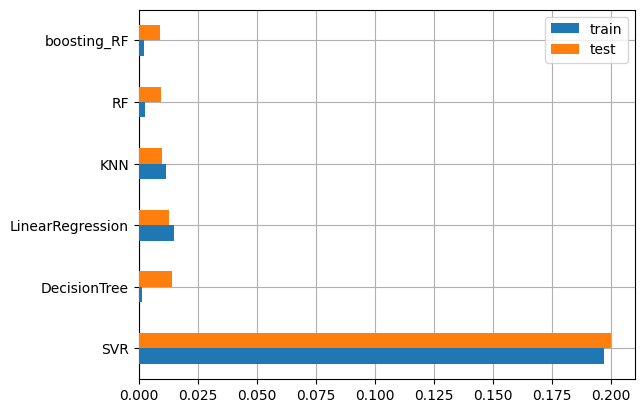

In [49]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [53]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_DecisionTree,prediksi_LinearRegression,prediksi_SVR,prediksi_RF,prediksi_boosting_RF
3880,313,310.2,317.0,310.0,312.2,313.7,314.7
873,242,245.3,246.0,245.3,245.5,243.8,244.2
1094,198,202.1,201.0,200.7,201.7,201.3,201.1
1778,170,170.4,172.0,169.1,170.7,170.9,170.9
4785,291,293.5,293.0,292.3,293.9,291.7,291.7


Dari tabel di atas, dapat dilihat bahwa setiap model menghasilkan prediksi yang bervariasi untuk setiap nilai aktual (y_true). Model K-Nearest Neighbor (KNN) dan Decision Tree memberikan prediksi yang cukup dekat dengan nilai aktual pada beberapa data, sementara Linear Regression dan Random Forest juga menunjukkan hasil yang kompetitif. Model AdaBoost dengan Random Forest (boosting_RF) tampaknya menghasilkan prediksi yang lebih konsisten, dengan kesalahan relatif yang lebih kecil pada nilai prediksi dibandingkan dengan beberapa model lainnya. Secara keseluruhan, performa model dapat bervariasi tergantung pada karakteristik data dan hubungan yang ada antara fitur dan target.